In [1]:
%pylab inline
from functools import partial
import pickle

import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Populating the interactive namespace from numpy and matplotlib


# Part 1

## 1.1 Linear Regression

###   1.

In [2]:
# Independent variable
x = [1, 2, 3, 4]

# Number of samples
m = len(x)

# Number of features
n = 1

# Build feature matrix
X = np.array(x)
X.shape = (m, n)

# Observations
y_train = np.array([3, 2, 0, 5])
y_train.shape = (1, m)

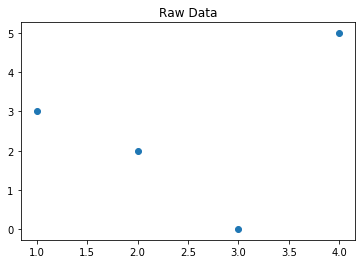

In [3]:
title("Raw Data")
scatter(X, y_train)
show()

In [4]:
def polynomial_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = x**j
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [84]:
def condition_number(X):
    """
    Find condition number resulting from design matrix
    """
    tmp = np.matrix(np.matmul(X.T, X))
    
    return np.linalg.cond(tmp)

In [5]:
def linear_regression(Phi, y_train):
    """
    Apply normal equations to find weights
    """

    a = np.matrix(np.matmul(Phi.T, Phi))
    b = np.matrix(np.matmul((Phi.T), y_train.T))

    w = np.matmul(a.I, b)
    
    return w

In [6]:
def polynomial(x, k, *w):
    """
    Apply polynomial weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*sample**j
        result[i] = res

    return result

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


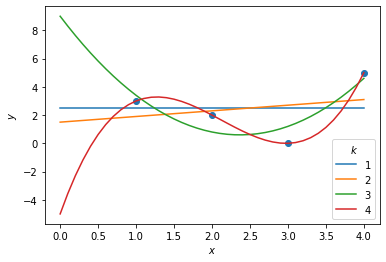

In [20]:
# Plot raw data points
figure()
scatter(X, y_train)

# Test data
x_test = np.arange(0, 4.1, 0.1)

# Plot each model
for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    plot(x_test, polynomial(x_test, len(w), *w), label=i)
    
# title('Linear Regression With Different Feature Maps')
legend(title='$k$')
xlabel('$x$')
ylabel('$y$')
savefig('fig1.eps')
show()

In [23]:
# Weights for k=1 to k=3

for k in range(1, 4):
    Phi = polynomial_feature_map(X, k)
    w = linear_regression(Phi, y_train)
    print(f"k={k}")
    print("**********")
    print(w)
    print("**********")


k=1
**********
[[2.5]]
**********
k=2
**********
[[1.5]
 [0.4]]
**********
k=3
**********
[[ 9. ]
 [-7.1]
 [ 1.5]]
**********
k=4
**********
[[-5.        ]
 [15.16666667]
 [-8.5       ]
 [ 1.33333333]]
**********


In [24]:
def sse(y, y_hat):        
    return sum((y-y_hat)**2)

def mse(y, y_hat):
    return sse(y, y_hat)/len(y_hat)

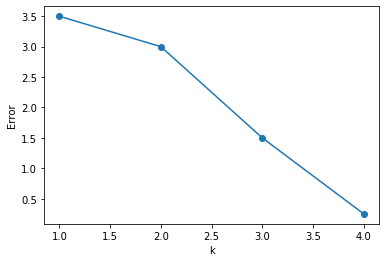

In [26]:
error_vec = []

for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    error_vec.append(mse(y_train, polynomial(x, len(w), *w)))

# title("MSE vs k")
plot(range(1, 5), error_vec, '-o')
xlabel('k')
ylabel('Error')
savefig('fig2.eps')
show()

###   2.

In [172]:
def g_sigma(x, sigma):
    epsilon = np.random.normal(scale=sigma, size=x.size)
    return np.sin(2*np.pi*x)**2 + epsilon

def exact(x):
    return np.sin(2*np.pi*x)**2

In [173]:
x_sample_30 = np.random.random(size=30)
x = np.arange(0, 1, 0.01)
g_sigma_noise = partial(g_sigma, sigma=0.07)
y_sample_30 = g_sigma_noise(x_sample_30)

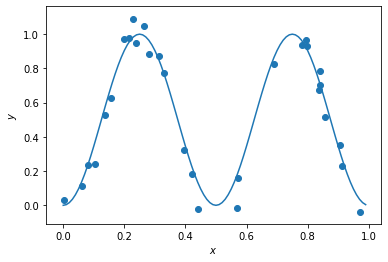

In [174]:
# title("Raw Data points and Exact Solution")
figure()
scatter(x_sample_30, y_sample_30)
plot(x, exact(x))
xlabel('$x$')
ylabel('$y$')
savefig('fig3.eps')
show()

In [175]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

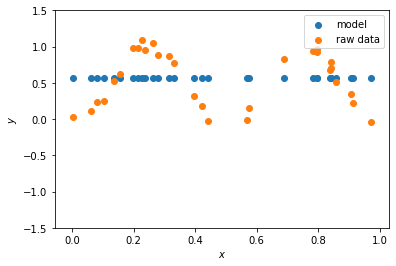

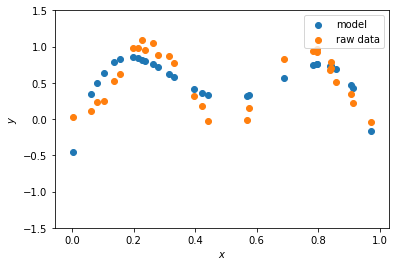

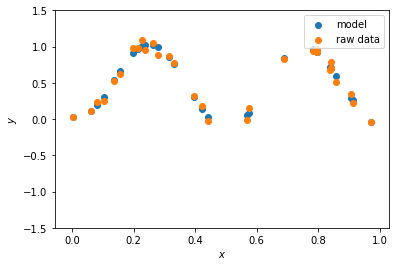

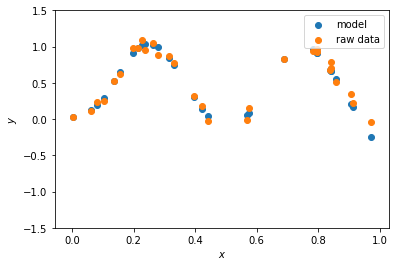

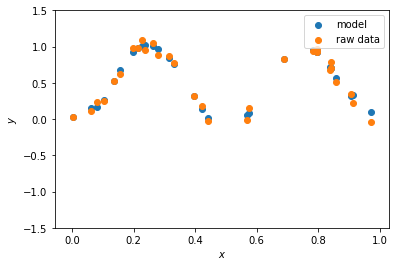

In [176]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
#     title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, polynomial(x_sample_30, len(w), *w),label='model',)
    scatter(x_sample_30, y_sample_30, label='raw data')
    legend(loc='best')
    ylim((-1.5, 1.5))
    xlabel('$x$')
    ylabel('$y$')
    savefig(f'fig_k_{k}.eps')
show()

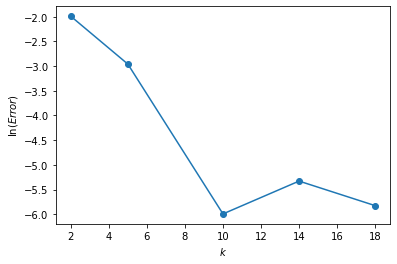

In [310]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

training_error_vec = []
condition_number_vec = []
k_vector = [2, 5, 10, 14, 18]
for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    condition_number_vec.append(condition_number(Phi))
    w = linear_regression(Phi, y_train)
    error = mse(y_sample_30, polynomial(x_sample_30, len(w), *w))
    training_error_vec.append(np.log(error))

# title("Training Error Vs $k$")
plot(k_vector, training_error_vec, '-o')
xlabel('$k$')
ylabel('$\ln(Error)$')
savefig('fig4.eps')
show()

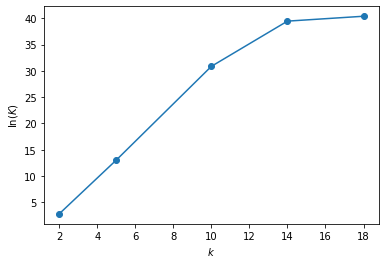

In [311]:
plot(k_vector, log(condition_number_vec), '-o')

ylabel('$\ln(K)$')
xlabel('$k$')
savefig('fig5.eps')
show()

The increasing error with K is due to the ill-conditioned matrix for large K values

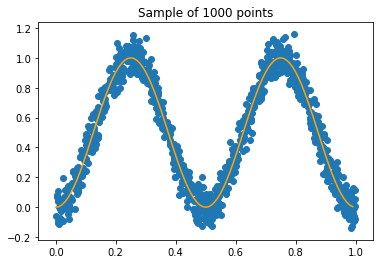

In [181]:
x_sample_1000 = np.random.random(size=1000)
g_partial = partial(g_sigma, sigma=0.07)
y_sample_1000 = g_partial(x_sample_1000)

scatter(x_sample_1000, y_sample_1000)

x = np.arange(0, 1, 0.01)
y = np.sin(2*np.pi*x)**2

plot(x, y, color='orange')
title("Sample of 1000 points")
show()

In [182]:
m = len(x_sample_1000)
n = 1

X_test = np.array(x_sample_1000)
X_test.shape = (m, n)
y_test = y_sample_1000
y_test.shape = (1, m)

In [312]:
test_error_vec = []
k_vector = arange(2,18,1)

for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    error = mse(y_test, polynomial(x_sample_1000, len(w), *w))
    test_error_vec.append(np.log(error))

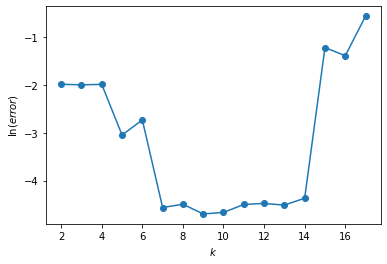

In [313]:
# title("Test Error Vs $k$")
plot(k_vector, test_error_vec, '-o')
ylabel("$\ln(error)$")
xlabel("$k$")
savefig('fig6.eps')
show()

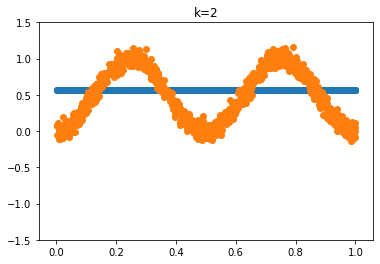

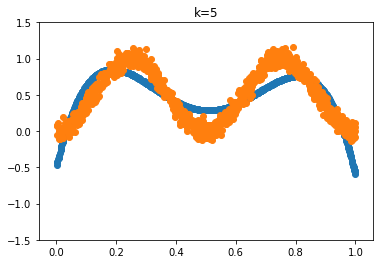

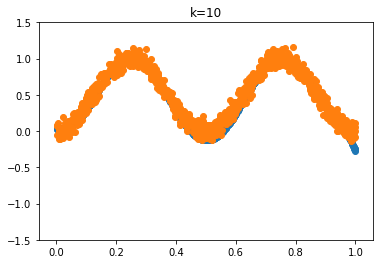

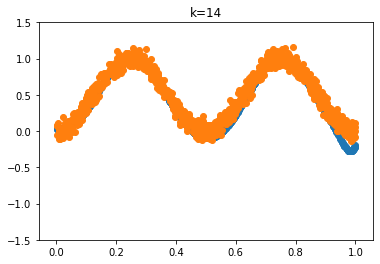

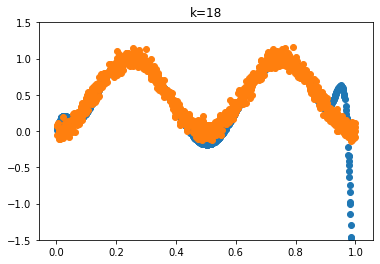

In [186]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)

    scatter(x_sample_1000, polynomial(x_sample_1000, len(w), *w), label=k)
    scatter(x_sample_1000, y_sample_1000)

    ylim((-1.5, 1.5))
show()

In [348]:
def error_experiment(
    feature_map,
    basis,
    x_sample_train,
    y_sample_train,
    x_sample_test,
    y_sample_test,
    k_vector
):
    m = len(x_sample_train)
    n = 1

    X = np.array(x_sample_train)
    X.shape = (m, n)
    y = y_sample_train
    y.shape = (1, m)

    train_error_vec = []
    test_error_vec = []
    
    
    for k in k_vector:
        Phi = feature_map(X, k)

        
        # Calculate training error
        train_error = mse(y_sample_train, basis(x_sample_train, len(w), *w))
        train_error_vec.append(train_error)
        
        # Calculate test error
        test_error = mse(y_sample_test, basis(x_sample_test, len(w), *w))
        test_error_vec.append(test_error)
    
    return train_error_vec, test_error_vec

def runner(feature_map, basis, k_vector, nruns=5):
    """
    Function runner
    """
    
    results = []
    test_error_all = []
    train_error_all = []
    
    run_counter = nruns

    while run_counter > 0:
        try:
            x_sample_train = np.random.random(size=30)
            y_sample_train = g_sigma_noise(x_sample_train)

            x_sample_test = np.random.random(size=1000)
            y_sample_test = g_sigma_noise(x_sample_test)

            train_error, test_error = error_experiment(feature_map,
                                                       basis,
                                                       x_sample_train,
                                                       y_sample_train, 
                                                       x_sample_test,
                                                       y_sample_test,                             
                                                       k_vector,
                                                      )

            test_error_all.append(test_error)
            train_error_all.append(train_error)
            
            run_counter -= 1
            
        except LinAlgError:
            # generated a close to singular matrix causing failure
            # of experiment
            pass
        
    
    return np.array(train_error_all), np.array(test_error_all)

In [ ]:
# Takes a long time!
train_results, test_results = runner(
    polynomial_feature_map, polynomial, k_vector=arange(2,19), nruns=100)

In [ ]:
with open('train_results_polynomial.pkl', 'wb') as f:
    pickle.dump(train_results, f)

with open('test_results_polynomial.pkl', 'wb') as f:
    pickle.dump(test_results, f)

In [ ]:
with open('train_results_polynomial.pkl', 'rb') as f:
    train_results = pickle.load(f)
    
with open('train_results_polynomial.pkl', 'rb') as f:
    test_results = pickle.load(f)

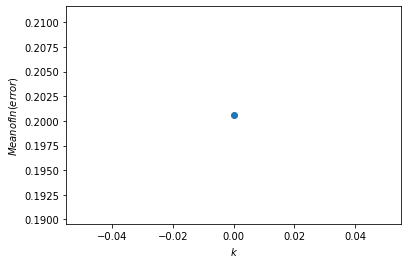

In [332]:
# title("Train Error (100 Runs)")
plot(arange(2,19), np.log(train_results.mean(axis=0)), '-o')
xlabel('$k$')
ylabel('$Mean of ln(error)$')
savefig('fig7.eps')

Text(0, 0.5, 'Mean of ln(error)')

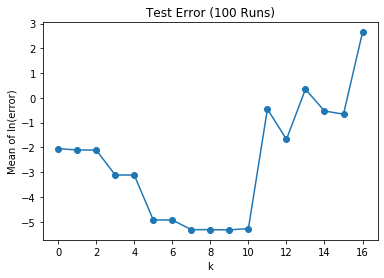

In [206]:
title("Test Error (100 Runs)")
plot(np.log(test_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


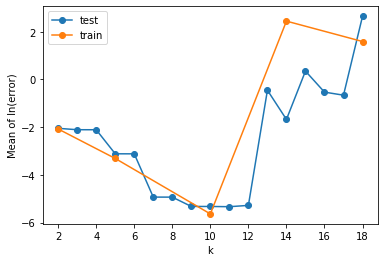

In [240]:
plot(arange(2,19),np.log(test_results.mean(axis=0)), '-o', label='test')
plot([2, 5, 10, 14, 18],np.log(train_results.mean(axis=0)), '-o', label='train')
xlabel('k')
ylabel('Mean of ln(error)')
legend()
savefig('fig8.eps')
show()

### 3.

In [241]:
def sinusoidal_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = np.sin((j+1)*np.pi*x)
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [242]:
def sinusoidal(x, k, *w):
    """
    Apply sinusoidal weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*np.sin((j+1)*np.pi*sample)
        result[i] = res

    return result

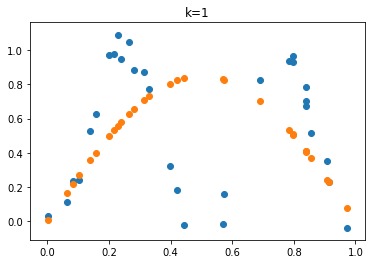

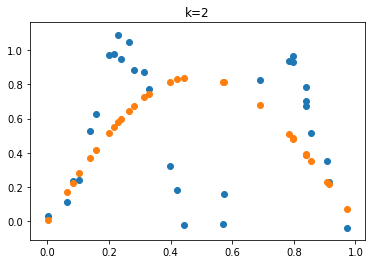

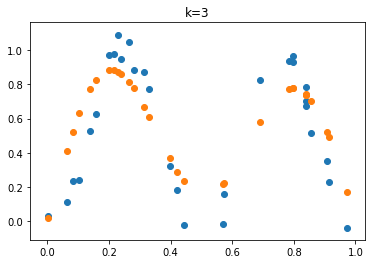

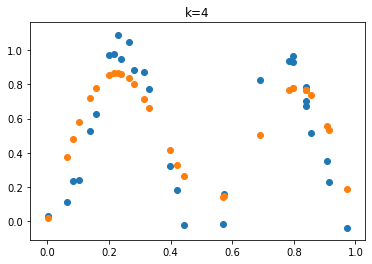

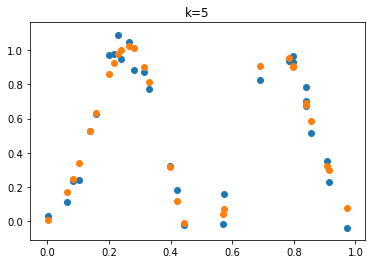

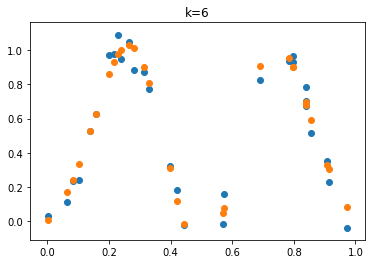

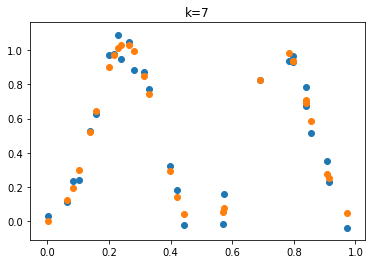

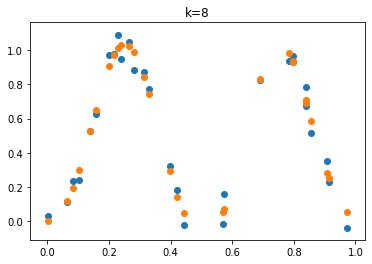

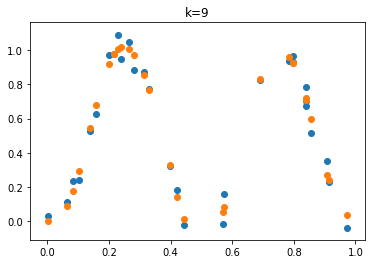

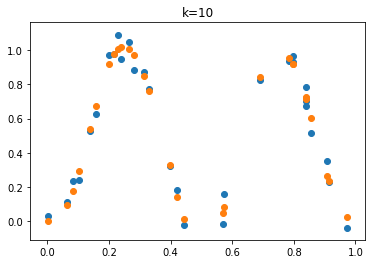

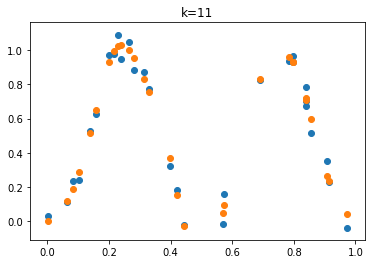

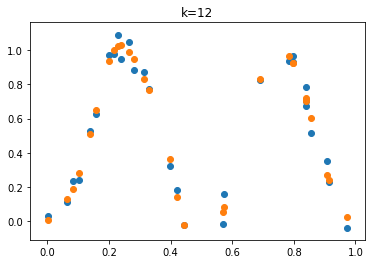

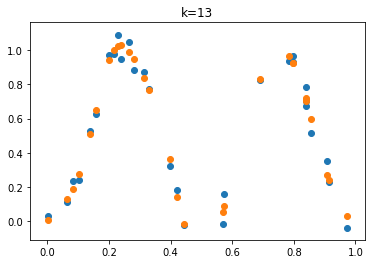

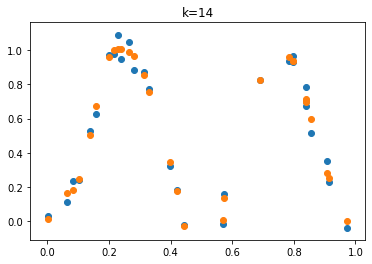

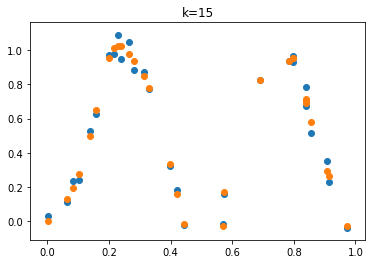

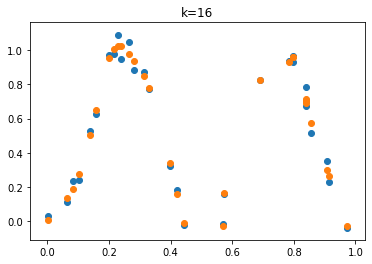

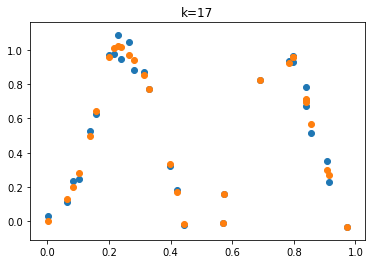

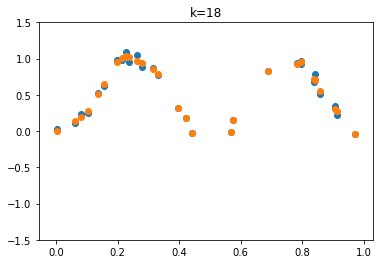

In [243]:
k_vector = arange(1, 19, 1)

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = sinusoidal_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, y_sample_30)    
    scatter(x_sample_30, sinusoidal(x_sample_30, len(w), *w), label=k)

ylim((-1.5, 1.5))
show()

In [322]:
train_results, test_results = runner(sinusoidal_feature_map, sinusoidal, k_vector=arange(2,19), nruns=1)

In [318]:
# with open('train_results_sinusoidal.pkl', 'wb') as f:
#     pickle.dump(train_results, f)

In [319]:
with open('train_results_sinusoidal.pkl', 'rb') as f:
    train_results = pickle.load(f)

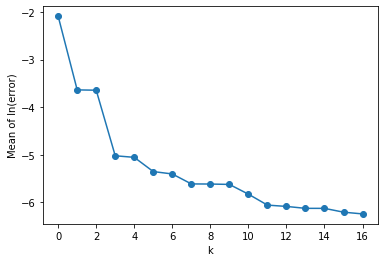

In [323]:
# title("Train Error (100 Runs)")
plot(np.log(train_results), '-o')
xlabel('k')
ylabel('Mean of ln(error)')
savefig('fig9.eps')

Text(0, 0.5, 'Mean of ln(error)')

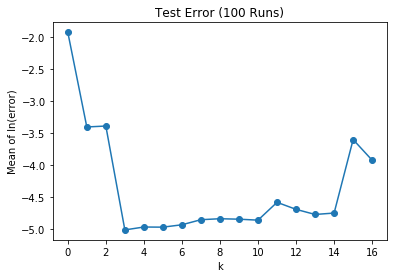

In [324]:
title("Test Error (100 Runs)")
plot(np.log(test_results), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

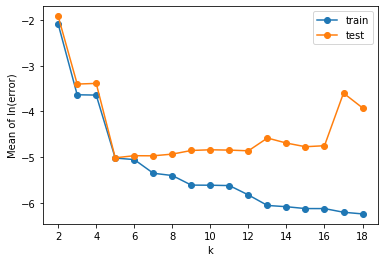

In [325]:
plot(arange(2,19,1), np.log(train_results), '-o', label='train')
plot(arange(2,19,1), np.log(test_results), '-o', label='test')
xlabel('k')
ylabel('Mean of ln(error)')
savefig('fig')
legend()

 ## 1.2 Boston housing and kernels

#### Data Preparation

In [ ]:
# Load data
boston_dataset = sio.loadmat('boston.mat')
X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

m, n = X_train.shape

### 4.a Fitting with a constant function

Intuitively just finding the mean of the dataset.

In [ ]:
training_ones = np.ones_like(y_train)
test_ones = np.ones_like(y_test)

In [ ]:
w = linear_regression(training_ones, y_train.T)
plot(y_train, 'o', label='House Prices')
plot(polynomial(X_train, len(w), *w), 'o')
legend()
ylabel('Price in $1000s')
show()

In [ ]:
mse_train = mse(y_train, polynomial(X_train, len(w), *w))
mse_test = mse(y_test, polynomial(X_test, len(w), *w))

In [ ]:
print(f"MSE on the training data is {mse_train}")
print(f"MSE on the test data is {mse_test}")

#### b.

This is like finding the mean of the dependent variable data, or just the bias term.

#### c.

In [ ]:
def identity_feature_map(X, k=None):
    """
    Identity feature map, add a bias term.
    """
   
    m, n = X.shape
    k = n + 1

    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k-1):
            mapped_feature[j] = x[j]
        
        # Add extra bias feature
        mapped_feature[-1] = 1
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)
    

In [ ]:
def identity_predictor(x, w):
    return np.dot(x, w)

In [ ]:
# pick out nth feature
for n in range(1,13):

    # Reshape, and use identity feature map to add bias term
    feature_n = X_train[:,n].reshape(len(X_train), 1)
    mapped_feature_n = identity_feature_map(feature_n)
    w = linear_regression(mapped_feature_n, y_train.T)
    mapped_feature_n_test = identity_feature_map(X_test[:,n].reshape(len(X_test), 1))
    predictions = [float(identity_predictor(feat, w)) for feat in mapped_feature_n_test]
    mean_square_error =  mse(y_train, predictions)
    print(f"MSE with feature {n} {mean_square_error}")

In [ ]:
w_all_attributes = linear_regression(identity_feature_map(X_train), y_train.T)

In [ ]:
predictions_all_attributes = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_test)]
plot(y_test, 'o', label='House Prices')
plot(predictions_all_attributes, 'o')
show()

In [ ]:
mean_square_error =  mse(y_test, np.array(predictions_all_attributes))
print(f"MSE with feature all attributes {mean_square_error}")

## 1.3 Kernelised Ridge Regression

In [27]:
def gaussian_kernel(xi, xj, sigma=0.1):
    tmp = np.linalg.norm(x=(xi-xj),ord=2)
    return np.exp((-tmp**2)/(2*sigma**2))

In [30]:
def kernel_regression(X_train, y_train, m, sigma, gamma):
    K = np.zeros(shape=(m, m))

    for i in range(0, m):
        for j in range(0, m):
            K[i][j] = gaussian_kernel(X_train[i], X_train[j], sigma)
    
    # Convert to matrix for inversion
    K = np.matrix(K)
    
    # Run optimisation
    alpha_opt = np.matmul((K+(gamma*m*np.identity(m))).I, y_train)
    
    return alpha_opt

In [ ]:
def kernel_predictor(X_train, X_test, alpha_opt, sigma):
    
    m, n = X_train.shape
    y_test = []

    for i, x_test in enumerate(X_test):
        res = 0
        for j in range(m):
            res += float(alpha_opt[j]*gaussian_kernel(x_test, X_train[j], sigma))
        y_test.append(res)

    return np.array(y_test)

#### 5.a

In [32]:
# Load data
boston_dataset = sio.loadmat('boston.mat')
X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

# Train/Test Split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

m, n = X_train.shape

In [ ]:
gamma_vector = np.array(
    [2**(i) for i in range(-40, -25, 1)]
)

sigma_vector = np.array(
    [2**(i) for i in linspace(7,13,13)]
)

In [ ]:
# Choose parameters
sigma = sigma_vector[0]
gamma = gamma_vector[2]

# Learn
alpha_opt = kernel_regression(X_train, y_train, m, sigma, gamma)

# Predictions
predictions = kernel_predictor(X_train, X_test, alpha_opt, sigma)

#### Cross validation

In [ ]:
parameters = [
    (sigma, gamma) 
    for sigma in sigma_vector
    for gamma in gamma_vector
]

In [ ]:
print(f"There are {len(parameters)} parameter combinations")

In [ ]:
def kfold_cross_validation(X, y, sigma, gamma, k=5):
    
    kf = KFold(n_splits=k)
    errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        m, n = X_train.shape

        alpha_opt = kernel_regression(
            X_train, y_train, m, sigma, gamma)
        

        y_hat = kernel_predictor(
            X_train, X_test, alpha_opt, sigma)

        error = sse(y_test, y_hat)
        errors.append(error)
    
    return np.array(errors).mean()

#### Run cross validation experiments over all parameter combinations

In [ ]:
cross_validation_results = []

for (s, g) in parameters[:9]:
    cross_validation_results.append(
        (s, g, kfold_cross_validation(X, y, s, g))
    )

# Convert to array for ease of indexing
cross_validation_results  = np.array(cross_validation_results)

with open('cv_results.pkl', 'wb') as f:
    pickle.dump(cross_validation_results, f)

In [4]:
with open('cv_results.pkl', 'rb') as f:
    cross_validation_results = pickle.load(f)

In [5]:
gammas, sigmas, cv_error = (
    cross_validation_results[:,0:1],
    cross_validation_results[:,1:2],
    cross_validation_results[:,2:]
)